<a href="https://colab.research.google.com/github/danyamrajuSanjay/Machine_Learning/blob/master/Dogs_Vs_Cats_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-08-14 14:52:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  87.8MB/s    in 0.7s    

2020-08-14 14:52:19 (87.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip=zipfile.ZipFile(local_zip,'r')
zip.extractall('/tmp')
zip.close()

In [4]:
base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')



In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


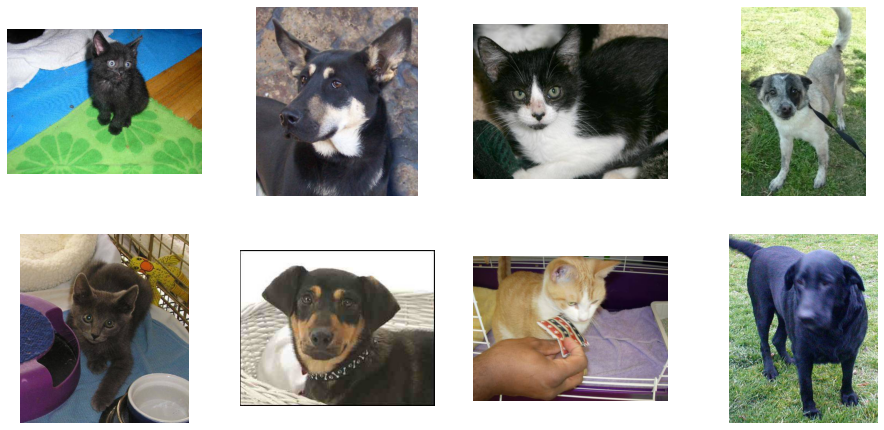

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.gcf()
fig.set_size_inches(4 * 4, 4 * 4)
for i in range(8):
  if(i%2==0):
    img=mpimg.imread(train_cats_dir+'/'+train_cat_fnames[i])
  else:
    img=mpimg.imread(train_dogs_dir+'/'+train_dog_fnames[i])
  plt.subplot(4,4,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.grid('false')

In [7]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [8]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [9]:
model=keras.models.Sequential([keras.layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(32,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Flatten(),
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dense(1,activation='sigmoid')                            
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [11]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_gen.flow_from_directory( train_dir,
                                              target_size=(150,150),
                                              batch_size=20,
                                              class_mode='binary'    
)

Found 2000 images belonging to 2 classes.


In [13]:
validation_gen=ImageDataGenerator(rescale=1.0/255)
validation_generator=validation_gen.flow_from_directory( validation_dir,
                                              target_size=(150,150),
                                              batch_size=20,
                                              class_mode='binary'    
)

Found 1000 images belonging to 2 classes.


In [14]:
validation_dir

'/tmp/cats_and_dogs_filtered/validation'

In [18]:
history=model.fit(train_generator,
                  epochs=15,
                  steps_per_epoch=100,
                  validation_data=validation_generator,
                  validation_steps=50,
                  verbose=2
)

Epoch 1/15
100/100 - 9s - loss: 0.0393 - accuracy: 0.9875 - val_loss: 2.4720 - val_accuracy: 0.7150
Epoch 2/15
100/100 - 8s - loss: 0.0717 - accuracy: 0.9820 - val_loss: 2.3721 - val_accuracy: 0.6820
Epoch 3/15
100/100 - 8s - loss: 0.0584 - accuracy: 0.9865 - val_loss: 2.3968 - val_accuracy: 0.7290
Epoch 4/15
100/100 - 8s - loss: 0.0455 - accuracy: 0.9900 - val_loss: 2.4970 - val_accuracy: 0.6930
Epoch 5/15
100/100 - 9s - loss: 0.0447 - accuracy: 0.9865 - val_loss: 2.8017 - val_accuracy: 0.7130
Epoch 6/15
100/100 - 8s - loss: 0.0633 - accuracy: 0.9835 - val_loss: 2.3831 - val_accuracy: 0.6790
Epoch 7/15
100/100 - 9s - loss: 0.0457 - accuracy: 0.9885 - val_loss: 2.4151 - val_accuracy: 0.6860
Epoch 8/15
100/100 - 8s - loss: 0.0442 - accuracy: 0.9885 - val_loss: 2.4489 - val_accuracy: 0.7110
Epoch 9/15
100/100 - 8s - loss: 0.0405 - accuracy: 0.9865 - val_loss: 2.8873 - val_accuracy: 0.7060
Epoch 10/15
100/100 - 8s - loss: 0.0468 - accuracy: 0.9875 - val_loss: 2.6965 - val_accuracy: 0.6990

Text(0.5, 1.0, 'Training and validation loss')

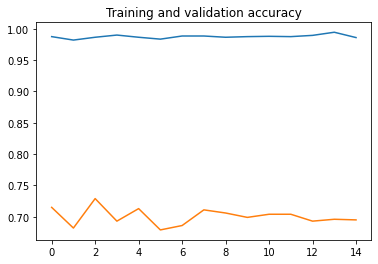

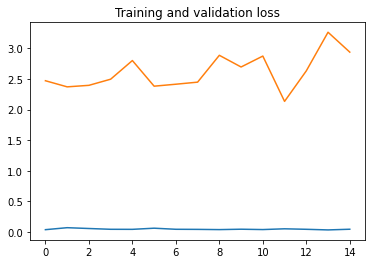

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
import matplotlib.pyplot as plt
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )